# PA KELOMPOK 3 KECERDASAN BUATAN

### NAMA ANGGOTA KELOMPOK : 
### - Hadie Pratama Tulili
### - Rafi Izdihar
### - Muhammad Firdaus

## Table Of Contents

1. [Tujuan Dibuatnya Program](#1.-Tujuan-Dibuatnya-Program)
2. [Library yang digunakan](#2.-Library-yang-digunakan)
3. [Directory List](#3.-Directory-List)
4. [Preprocessing Data](#4.-Preprocessing-Data)
5. [Visualisasi](#5.-Visualisasi)
6. [Modelling](#6.-Modelling)
7. [Evaluate](#7.-Evaluate)


# 1. Tujuan Dibuatnya Program

1. Untuk mengaplikasikan Convolutional Neural Networks (CNN) guna mengklasifikasikan dan memprediksi gambar anime, kartun atau manusia.

2. Untuk mengklasifikasikan suatu gambar ke salah satu dari 3 kategori : 
    **Anime, Cartoon, Human**
    
3. Jumlah data training yang digunakan sebesar 6856 sampel, jumlah data testing sebesar 1957 sampel serta jumlah data validation sebesar 2937 sampel.

# 2. Library yang digunakan

In [63]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from pathlib import Path
import seaborn as sns
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# 3. Directory List

#### Input Folder Utama yang berisi Anime, Cartoon dan Human

In [44]:
# directory list
main_path = './Data/'

# 4. Preprocessing Data

### Proses Augmentasi pada Gambar
> Pada Data Train 
- Rescale
- Rotation
- Scaling 
- Zoom in / Zoom out 
- fillm_mode
- Horizontal Flip
- Vertical Flip
- Validation split
> Pada Data Validation dan Testing
- Rescale
- Validation split
---
### Membagi direktori utama(main_path) menjadi 3 dengan variabel **train_set**, **val_set** dan **test_set**
> Pada Data Training, Validaiton dan Testing

- Mengubah resolusi gambar menjadi 128 x 128.
- Batch_size 32 yang mana dalam satu step ada 32 sampel gambar yang         dimasukkan dalam step training atau validation.


In [45]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=30, 
                                    shear_range=0.2, 
                                    zoom_range=(0.5,1.0), 
                                    fill_mode='nearest', 
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    validation_split = 0.3)

train_set = train_datagen.flow_from_directory(main_path,
                                                subset = 'training',
                                                shuffle = True,
                                                seed = 123,
                                                batch_size=32,
                                                target_size=(128, 128),
                                                class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255,
                                validation_split = 0.3)

val_set = val_datagen.flow_from_directory(main_path,
                                            batch_size=32,
                                            shuffle = True,
                                            seed = 123,                                            
                                            subset = 'validation',
                                            target_size=(128, 128),
                                            class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255,
                                 validation_split = 0.2)

test_set = test_datagen.flow_from_directory(main_path,
                                                subset = 'validation',
                                                shuffle = True,
                                                seed = 123,                                                
                                                batch_size=32,
                                                target_size=(128, 128),
                                                class_mode='categorical')

Found 6243 images belonging to 3 classes.
Found 2674 images belonging to 3 classes.
Found 1782 images belonging to 3 classes.


# 5. Visualisasi

### Menentukan Class untuk Visualisasi

In [46]:
# class names
class_names = ['Anime', 'Cartoon', 'Human']
class_names

['Anime', 'Cartoon', 'Human']

#### Visualisasi Gambar Berdasarkan Nama Label
- Dari semua kelas dibuat subplot
- Berbentuk matriks 4x4
- Tidak menggunakan pengukuran (axis)

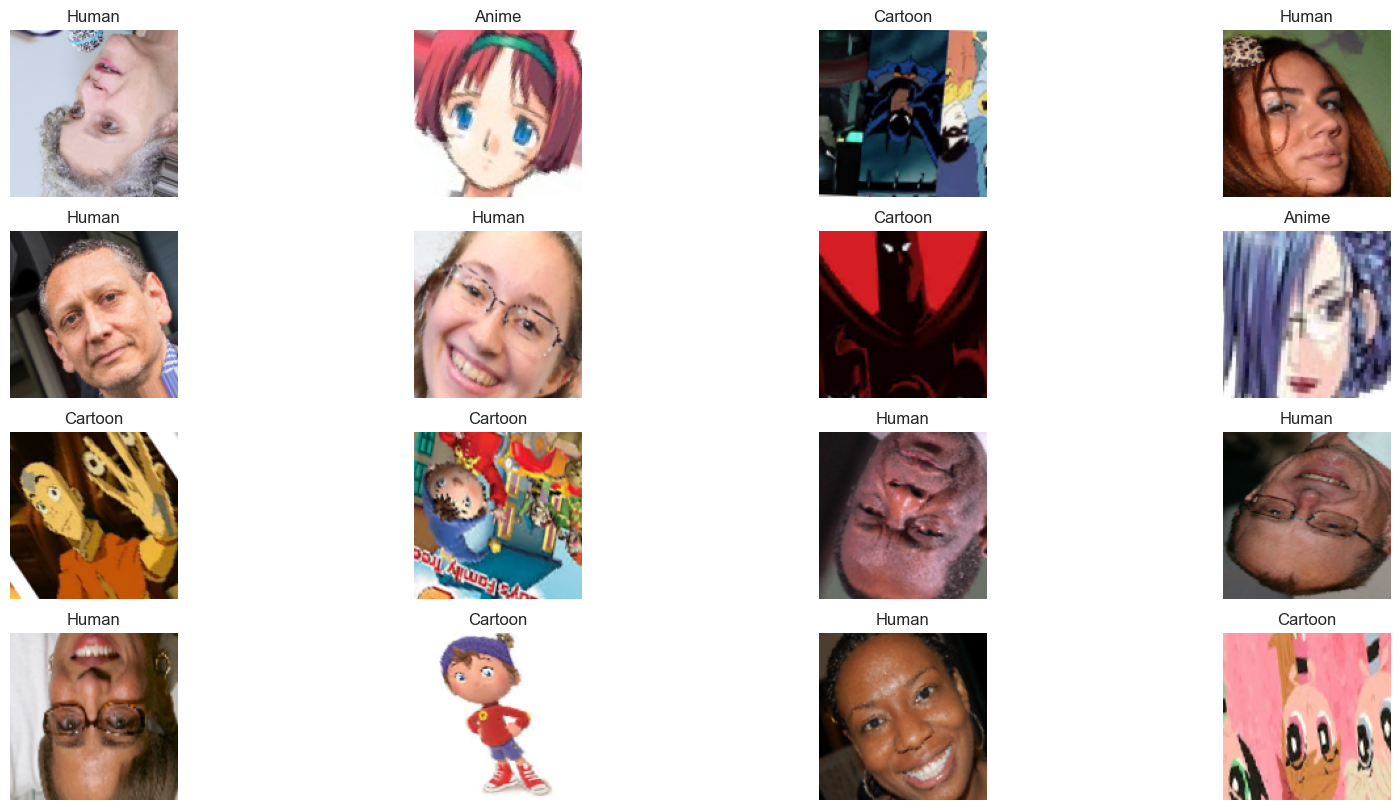

In [47]:
# data visualization
plt.figure(figsize=(20, 10))
images, labels = train_set.next()

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[tf.argmax(labels[i])])
    plt.axis("off")

plt.show()

# Meta Data

In [48]:
data_train = []
data_test = []
data_val = []

for i in range(len(train_set)) :
    x,y = train_set.next()
    for j in range(len(y)) :
        data_train.append(class_names[tf.argmax(y[j])])

for i in range(len(test_set)) :
    x,y = test_set.next()
    for j in range(len(y)) :
        data_test.append(class_names[tf.argmax(y[j])])
        
for i in range(len(val_set)) :
    x,y = val_set.next()
    for j in range(len(y)) :
        data_val.append(class_names[tf.argmax(y[j])])

banyak_data = len(data_train) + len(data_test) + len(data_val)

print("Nama Dataset      : Anime-VS-Cartoon-VS-Human-Dataset")
print("Ukuran Gambar     : [128, 128, 3]")
print("Kelas             :",class_names)
print("Banyak Data       :",banyak_data)
print("Banyak Data Train :",len(data_train))
print("Banyak Data Test  :",len(data_test))
print("Banyak Data val   :",len(data_val))

Nama Dataset      : Anime-VS-Cartoon-VS-Human-Dataset
Ukuran Gambar     : [128, 128, 3]
Kelas             : ['Anime', 'Cartoon', 'Human']
Banyak Data       : 10699
Banyak Data Train : 6243
Banyak Data Test  : 1782
Banyak Data val   : 2674


#### Mengkonversi Dataset menjadi DataFrame

In [80]:
paths = [path.parts[-2:] for path in
        Path(main_path).rglob('*.*')] #*.* agar semua format gambar bisa diambil

df = pd.DataFrame(data=paths, columns=['Class', 'Image']) #membuat nama koloom utk dataframe
df = df.sort_values('Class', ascending=True) #sorting nama Class
df.reset_index(drop=True, inplace=True) #sorting indeks setiap baris
df       

,Class,Image
0,anime,0_2000.jpg
1,anime,2800_2002.jpg
2,anime,2801_2002.jpg
3,anime,2802_2002.jpg
4,anime,2803_2002.jpg
...,...,...
8912,human,01002.png
8913,human,01003.png
8914,human,01004.png
8915,human,00995.png


In [68]:
train_pie = df['Class'].value_counts().rename_axis("Class").reset_index(name="Image")

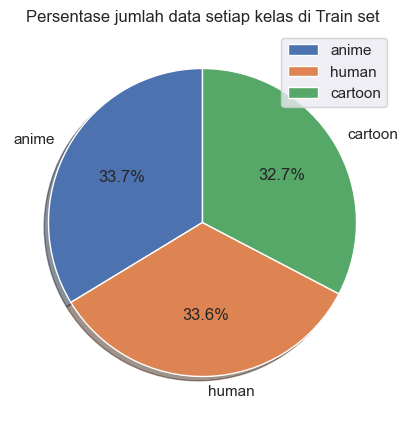

In [70]:
plt.figure(figsize=(10,5))
plt.pie(
    train_pie['Image'],
    labels=train_pie['Class'],
    startangle=90,
    autopct='%.1f%%',
    shadow=True
)
plt.title("Persentase jumlah data setiap kelas di Train set")
plt.legend()
plt.show()

#### Jumlah Data setiap kelas dalam Training

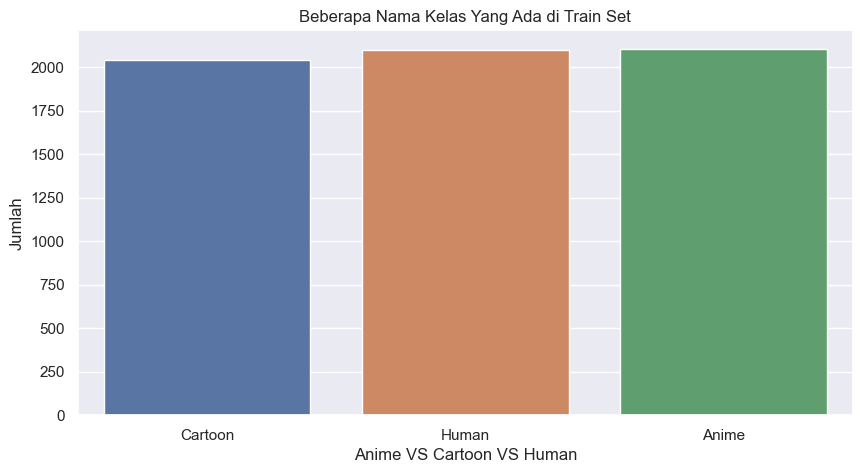

In [49]:
plt.figure(figsize=(10, 5))

sns.set_theme()

sns.countplot(x=data_train)
plt.xlabel('Anime VS Cartoon VS Human')
plt.ylabel('Jumlah')
plt.title('Beberapa Nama Kelas Yang Ada di Train Set')
plt.show()

#### Jumlah Data setiap kelas dalam Testing

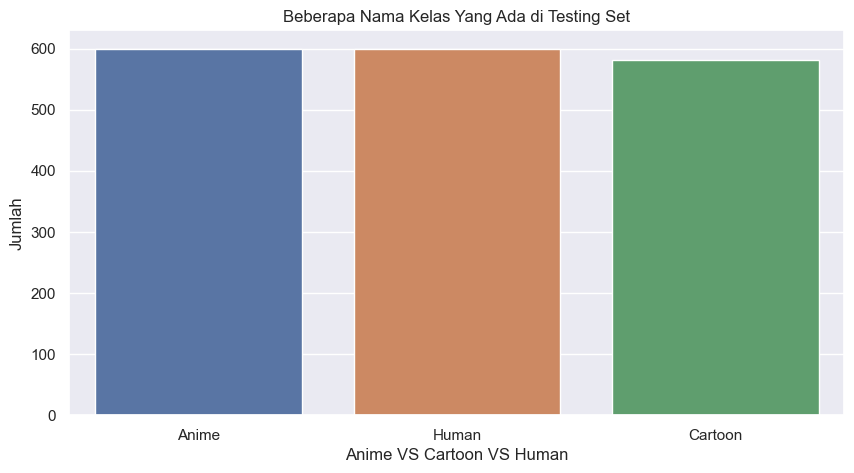

In [54]:
plt.figure(figsize=(10, 5))

sns.set_theme()


sns.countplot(x=data_test)
plt.xlabel('Anime VS Cartoon VS Human')
plt.ylabel('Jumlah')
plt.title('Beberapa Nama Kelas Yang Ada di Testing Set')
plt.show()

#### Jumlah Data setiap kelas dalam Validation

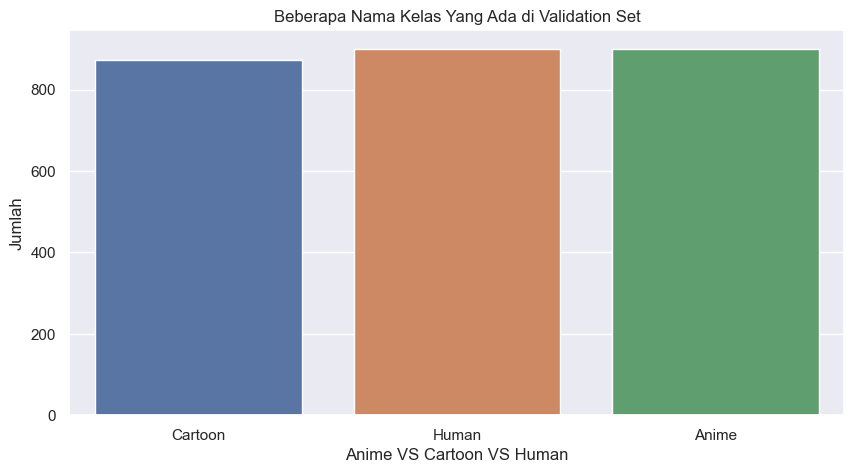

In [12]:
plt.figure(figsize=(10, 5))

sns.set_theme()


sns.countplot(x=data_val)
plt.xlabel('Anime VS Cartoon VS Human')
plt.ylabel('Jumlah')
plt.title('Beberapa Nama Kelas Yang Ada di Validation Set')
plt.show()

# 6. Modelling
> Modelling dengan beberapa layer
1. Input layer
    - Convolution filter sebanyak 64, input shape 128x128 3 karena rgb, fungsi aktivasi relu
    - Pooling dengan matrix 2x2

2. Hidden Layer
    - Pooling sebanyak 2 dengan matrix 2x2
    - Convolution filter 16 dan 32 dengan matrix 3x3 dengan aktivasi relu
    - Layer Dropout 0.5
    - Layer Flatten

3. Output Layer    
    - Layer Dense sebanyak 3 filter dan aktivasi softmax

In [13]:
model = tf.keras.Sequential([

#Input layer
tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=[128, 128, 3]),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),

#Hidden layer
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Flatten(),
    
#Output layer
tf.keras.layers.Dense(3, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        4

#### Compile model untuk mengatur konfigurasi model
- loss menggunakan metode Categorical Crossentropy
- Optimizer menggunakan metode Adam
- Kriteria berdasarkan akurasi

In [15]:
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [16]:
earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
)

#### Proses melatih data dari model yang dibuat diatas
- Dengan iterasi sebanyak 10
- Mengambil data validation

In [17]:
hasil = model.fit(train_set, epochs=10, validation_data=val_set, verbose=1, callbacks=[earlyStopping])

Epoch 1/10
196/196 [==============================] - 202s 1s/step - loss: 0.4711 - accuracy: 0.8019 - val_loss: 0.5735 - val_accuracy: 0.7681
Epoch 2/10
196/196 [==============================] - 193s 983ms/step - loss: 0.2325 - accuracy: 0.9151 - val_loss: 0.4803 - val_accuracy: 0.8156
Epoch 3/10
196/196 [==============================] - 177s 902ms/step - loss: 0.1948 - accuracy: 0.9282 - val_loss: 0.2596 - val_accuracy: 0.9076
Epoch 4/10
196/196 [==============================] - 178s 909ms/step - loss: 0.1611 - accuracy: 0.9422 - val_loss: 0.2213 - val_accuracy: 0.9174
Epoch 5/10
196/196 [==============================] - 177s 904ms/step - loss: 0.1468 - accuracy: 0.9468 - val_loss: 0.2376 - val_accuracy: 0.9155
Epoch 6/10
196/196 [==============================] - 174s 887ms/step - loss: 0.1414 - accuracy: 0.9499 - val_loss: 0.1852 - val_accuracy: 0.9375
Epoch 7/10
196/196 [==============================] - 174s 886ms/step - loss: 0.1300 - accuracy: 0.9543 - val_loss: 0.1502 - va

# 7. Evaluate
### untuk menguji Hasil dari validation menggunakan evaluate

In [18]:
val_evaluate = model.evaluate(val_set, verbose=0)
print(f'Val loss     : {val_evaluate[0] * 100} %')
print(f'Val accuracy : {val_evaluate[1] * 100} %')

Val loss     : 13.968677818775177 %
Val accuracy : 94.98878121376038 %


## Visualisasi perbandingan Akurasi dan Loss Model

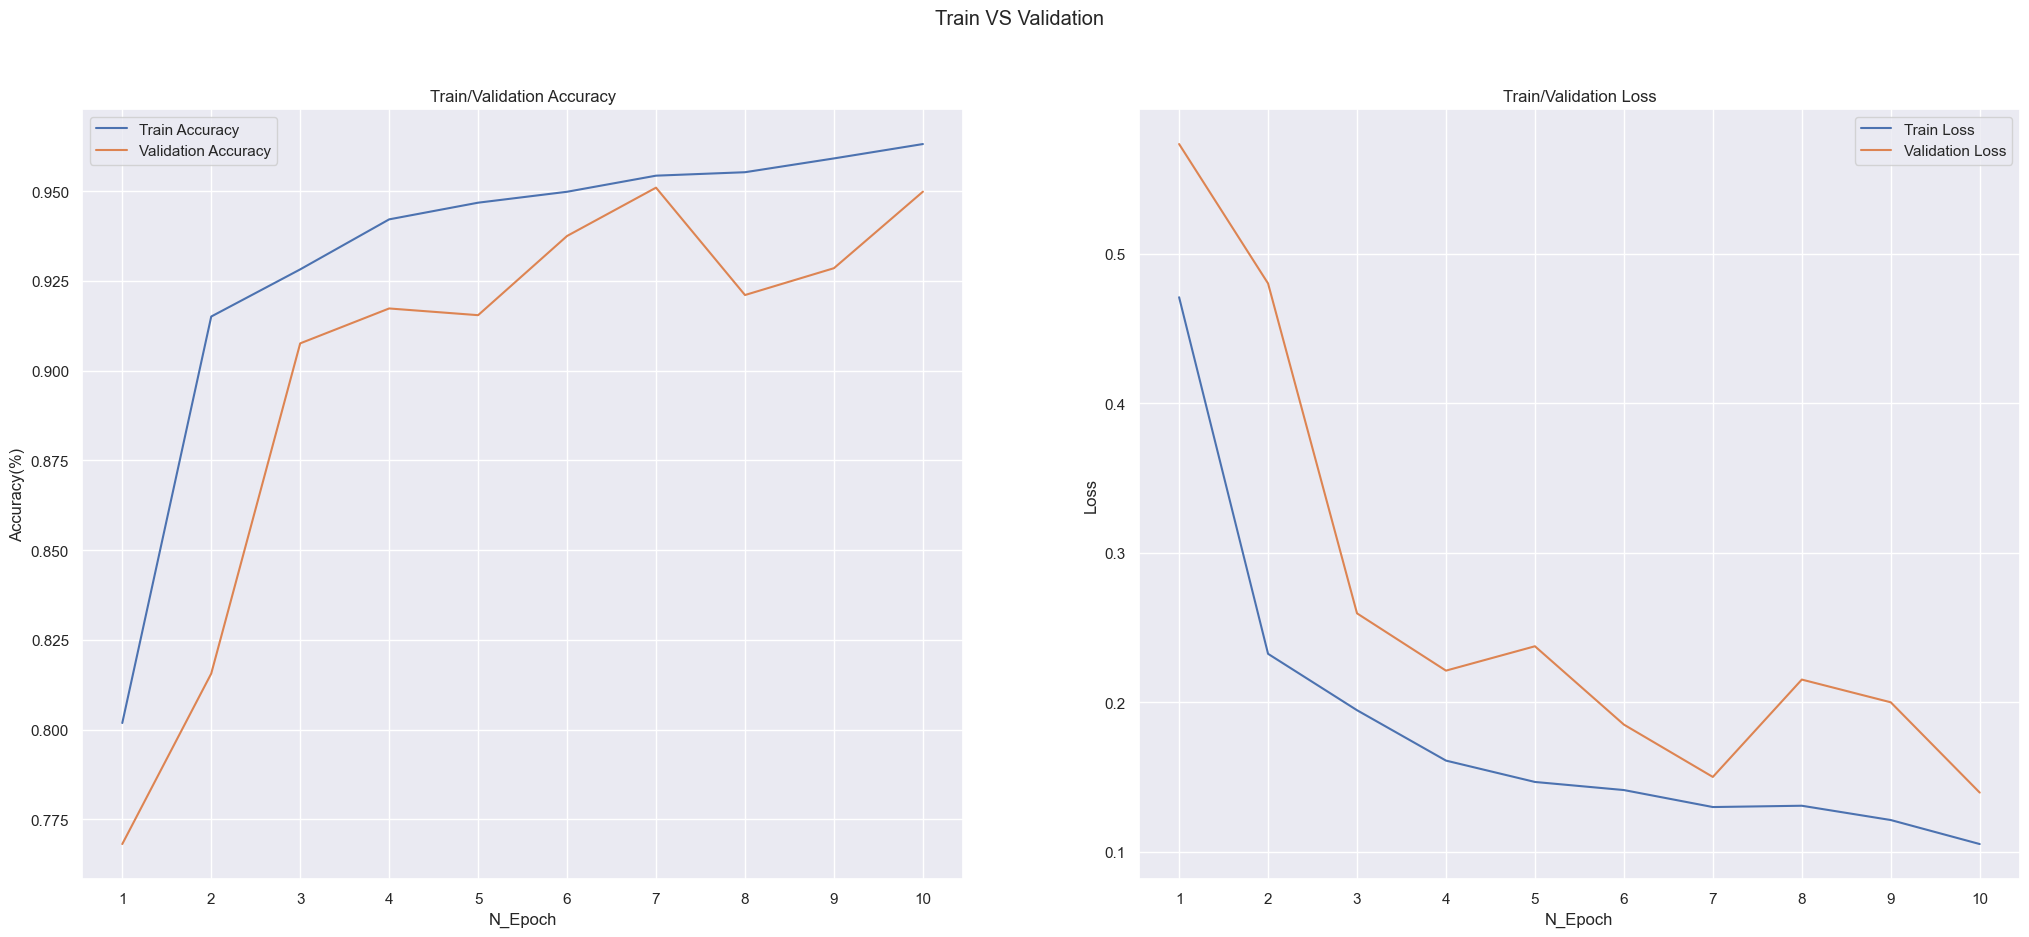

In [19]:
epoch = [i+1 for i in range(10)]


plt.figure(figsize=(25, 10))
plt.suptitle('Train VS Validation')

#Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch,y = hasil.history['accuracy'],label ='Train Accuracy')
sns.lineplot(x=epoch,y = hasil.history['val_accuracy'],label ='Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('N_Epoch')
plt.title("Train/Validation Accuracy")

#Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch,y = hasil.history['loss'],label ='Train Loss')
sns.lineplot(x=epoch,y = hasil.history['val_loss'],label ='Validation Loss')

plt.xticks(epoch)
plt.title("Train/Validation Loss")
plt.xlabel('N_Epoch')
plt.ylabel('Loss')
plt.show()

## Hasil Prediksi
### Visualisasi Hasil prediksi yang benar

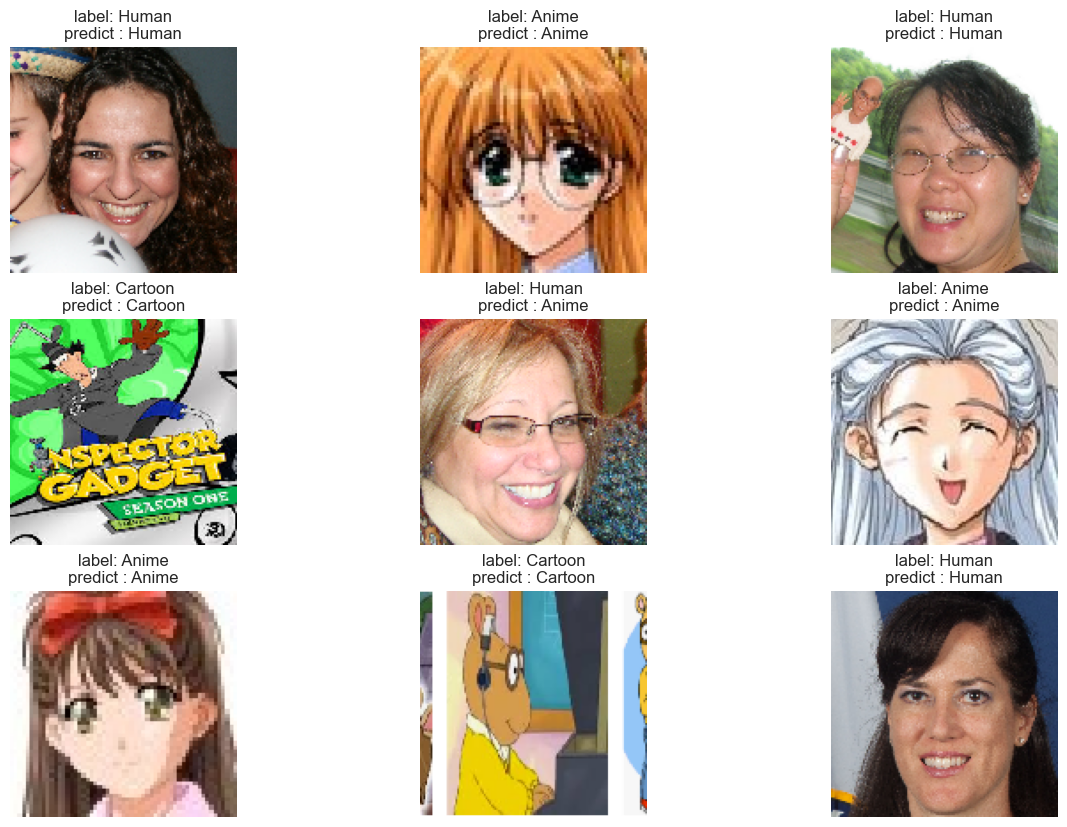

In [81]:
image ,label = next(iter(test_set))


plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}\npredict : {class_names[y_pred]}')

### Visualisasi Hasil prediksi yang salah

IndexError: index 32 is out of bounds for axis 0 with size 32

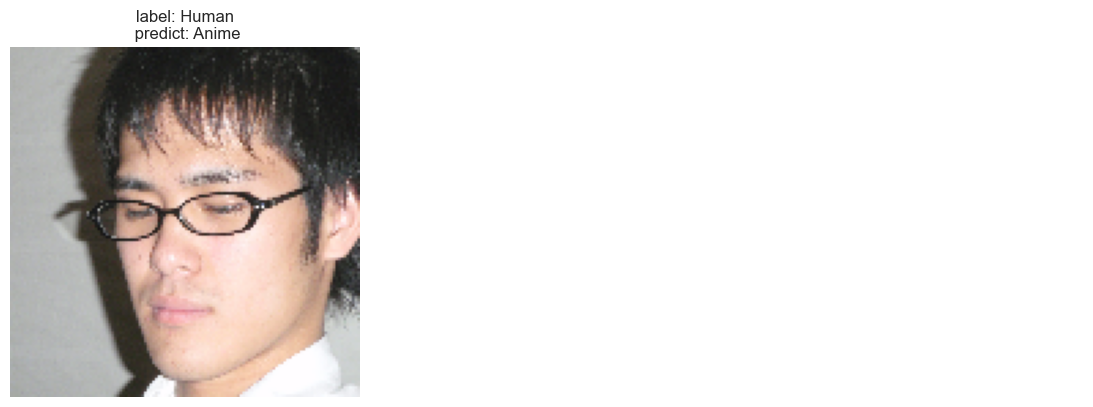

In [22]:
#Plot prediction Error
image ,label = next(iter(test_set))
plt.figure(figsize=(15,10))
i,j = 0,0
while (j < 4):
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(2,2,j+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    if (TrueLabel != class_names[y_pred]):
        plt.imshow(tf.squeeze(image[i]))
        plt.title(f'label: {TrueLabel}\n predict: {class_names[y_pred]}')
        j+=1
    i+=1

In [ ]:
y_test = []
y_pred = []

for i in range(len(test_set)) :
    x,y = test_set.next()
    for j in range(len(y)) :
        y_test.append(class_names[tf.argmax(y[j])])
        y_pred.append(class_names[np.argmax(model.predict(x[j][None,...],verbose=0))])

print("Banyak data yang di tes      : ",len(y_test))
print("Banyak data yang di prediksi : ",len(y_pred)) 

Banyak data yang di tes      :  1782
Banyak data yang di prediksi :  1782


### Confusion Matrix

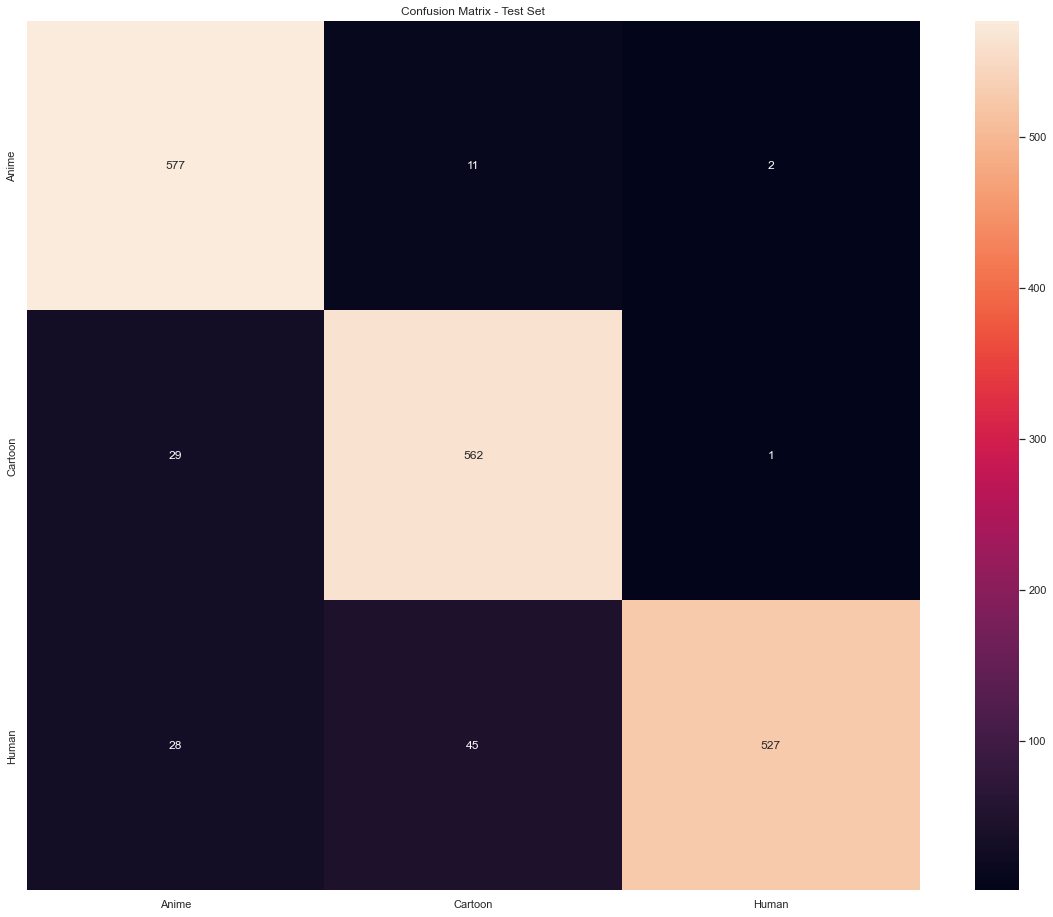

In [ ]:
plt.figure(figsize=(20, 16))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion Matrix - Test Set")
plt.show()

### Classification Report

In [ ]:
#Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report
              precision    recall  f1-score   support

       Anime       0.91      0.98      0.94       590
     Cartoon       0.91      0.95      0.93       592
       Human       0.99      0.88      0.93       600

    accuracy                           0.93      1782
   macro avg       0.94      0.94      0.93      1782
weighted avg       0.94      0.93      0.93      1782

